In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path
import pandas as pd

In [2]:
# Create a reference to the CSV and import it into a Pandas DataFrame
csv_path = "Resources/PopularVote_Tally.csv"
csv_path1 = "Resources/apportionment.csv"

popularvote_df = pd.read_csv(csv_path)
popularvote_df.head()

,Election Year,Democratic Votes,Republican Votes,Winner
0,1856,1836072,1342345,Democratic
1,1860,1375157,1866452,Republican
2,1864,1805237,2218388,Republican
3,1868,2703249,3013791,Republican
4,1872,2834761,3598235,Republican


In [3]:
# Drop winner column
dem_rep_popvote = popularvote_df.drop(columns=['Winner'])
dem_rep_popvote.head()

,Election Year,Democratic Votes,Republican Votes
0,1856,1836072,1342345
1,1860,1375157,1866452
2,1864,1805237,2218388
3,1868,2703249,3013791
4,1872,2834761,3598235


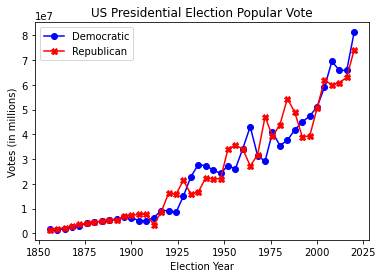

In [4]:
# Plot Democratic Votes line
ax = dem_rep_popvote.plot(x='Election Year', 
                          y='Democratic Votes',
                          color='blue',
                          marker='o',
                          label='Democratic')

# Plot Republican Votes line  
dem_rep_popvote.plot(x='Election Year',
                     y='Republican Votes',
                     color='red', 
                     marker='X',
                     label='Republican',
                     ax=ax)

ax.set_title('US Presidential Election Popular Vote')
ax.set_xlabel('Election Year')
ax.set_ylabel('Votes (in millions)')
ax.legend()

plt.show()

In [5]:
# Read 2nd file containing population data from US Census Report
uspopulation_df = pd.read_csv(csv_path1)
uspopulation_df.head()

,Name,Geography Type,Year,Resident Population,Percent Change in Resident Population,Resident Population Density,Resident Population Density Rank,Number of Representatives,Change in Number of Representatives,Average Apportionment Population Per Representative
0,Alabama,State,1910,2138093,16.9,42.2,25.0,10.0,1.0,213809.0
1,Alaska,State,1910,64356,1.2,0.1,52.0,NaN,NaN,NaN
2,Arizona,State,1910,204354,66.2,1.8,49.0,NaN,NaN,NaN
3,Arkansas,State,1910,1574449,20.0,30.3,30.0,7.0,0.0,224921.0
4,California,State,1910,2377549,60.1,15.3,38.0,11.0,3.0,216051.0


In [6]:
reduced_df = uspopulation_df[['Name', 'Geography Type', 'Year', 'Resident Population']]
reduced_df.head()

,Name,Geography Type,Year,Resident Population
0,Alabama,State,1910,2138093
1,Alaska,State,1910,64356
2,Arizona,State,1910,204354
3,Arkansas,State,1910,1574449
4,California,State,1910,2377549


In [7]:
# Filter the data frame to catpure "Nation" numbers
nation_data = reduced_df[reduced_df['Geography Type'] == 'Nation']
nation_data = pd.DataFrame(nation_data)
nation_data.head()

,Name,Geography Type,Year,Resident Population
56,United States,Nation,1910,92228531
113,United States,Nation,1920,106021568
170,United States,Nation,1930,123202660
227,United States,Nation,1940,132165129
284,United States,Nation,1950,151325798


In [8]:
# Drop the 'Name' and 'Geography' columns
uspopulation_clean = nation_data.drop(columns=['Name', 'Geography Type'])
uspopulation_clean.head()

,Year,Resident Population
56,1910,92228531
113,1920,106021568
170,1930,123202660
227,1940,132165129
284,1950,151325798


In [9]:
# Rename 'Year' column to match df2 
uspopulation_clean = uspopulation_clean.rename(columns={'Year':'Election Year'})

# Perform outer join on 'Election Year'
population_vote_merged = uspopulation_clean.merge(dem_rep_popvote, on='Election Year', how='outer')

# Reorder columns
cols = ['Election Year', 'Democratic Votes', 'Republican Votes', 'Resident Population']
population_vote_merged = population_vote_merged[cols]

print(population_vote_merged)

    Election Year  Democratic Votes  Republican Votes  Resident Population
0            1910               NaN               NaN           92228531.0
1            1920         9139661.0        16144093.0          106021568.0
2            1930               NaN               NaN          123202660.0
3            1940        27313945.0        22347744.0          132165129.0
4            1950               NaN               NaN          151325798.0
5            1960        34220984.0        34108157.0          179323175.0
6            1970               NaN               NaN          203211926.0
7            1980        35480115.0        43903230.0          226545805.0
8            1990               NaN               NaN          248709873.0
9            2000        50999897.0        50456002.0          281421906.0
10           2010               NaN               NaN          308745538.0
11           2020        81283501.0        74223958.0          331449281.0
12           1856        

In [10]:
# Rename 'Election Year' column to 'Year'
population_vote_merged = population_vote_merged.rename(columns={'Election Year':'Year'}) 

In [11]:
# Replace NaN with 0
population_vote_merged = population_vote_merged.fillna(0)

In [12]:
# Sort values by Year column 
population_vote_merged = population_vote_merged.sort_values(by='Year')

In [13]:
# View dataframe
print(population_vote_merged)

    Year  Democratic Votes  Republican Votes  Resident Population
12  1856         1836072.0         1342345.0                  0.0
13  1860         1375157.0         1866452.0                  0.0
14  1864         1805237.0         2218388.0                  0.0
15  1868         2703249.0         3013791.0                  0.0
16  1872         2834761.0         3598235.0                  0.0
17  1876         4284020.0         4036572.0                  0.0
18  1880         4442035.0         4454416.0                  0.0
19  1884         4914482.0         4856903.0                  0.0
20  1888         5534488.0         5443892.0                  0.0
21  1892         5556918.0         5176108.0                  0.0
22  1896         6509052.0         7104779.0                  0.0
23  1900         6358071.0         7207923.0                  0.0
24  1904         5083880.0         7630457.0                  0.0
25  1908         5079428.0         7678908.0                  0.0
0   1910  

In [14]:
# Remove decimal places from values
population_vote_merged['Year'] = population_vote_merged['Year'].astype(int)
population_vote_merged['Democratic Votes'] = population_vote_merged['Democratic Votes'].astype(int) 
population_vote_merged['Republican Votes'] = population_vote_merged['Republican Votes'].astype(int)
population_vote_merged['Resident Population'] = population_vote_merged['Resident Population'].astype(int)



In [15]:
# Filter rows where all columns are > 0
population_vote_merged = population_vote_merged[(population_vote_merged['Year'] > 0) & 
                                                (population_vote_merged['Democratic Votes'] > 0) &
                                                (population_vote_merged['Republican Votes'] > 0) & 
                                                (population_vote_merged['Resident Population'] > 0)]

print(population_vote_merged)

    Year  Democratic Votes  Republican Votes  Resident Population
1   1920           9139661          16144093            106021568
3   1940          27313945          22347744            132165129
5   1960          34220984          34108157            179323175
7   1980          35480115          43903230            226545805
9   2000          50999897          50456002            281421906
11  2020          81283501          74223958            331449281


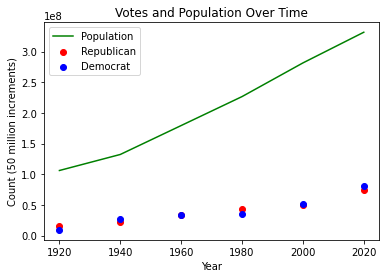

In [16]:
# Scatter plot 
plt.scatter(population_vote_merged['Year'], population_vote_merged['Republican Votes'], c='red', label='Republican')
plt.scatter(population_vote_merged['Year'], population_vote_merged['Democratic Votes'], c='blue', label='Democrat')

# Population line plot
plt.plot(population_vote_merged['Year'], population_vote_merged['Resident Population'], c='green', label='Population')

# Add labels and legend
plt.title('Votes and Population Over Time')  
plt.xlabel('Year')
plt.ylabel('Count (50 million increments)')
plt.legend()

plt.show()

In [17]:
# Calculate differences between rows
population_vote_merged['Dem Vote Diff'] = population_vote_merged['Democratic Votes'].diff()
population_vote_merged['Rep Vote Diff'] = population_vote_merged['Republican Votes'].diff() 
population_vote_merged['Pop Diff'] = population_vote_merged['Resident Population'].diff()

# Calculate correlations
dem_corr = population_vote_merged['Dem Vote Diff'].corr(population_vote_merged['Pop Diff'])
rep_corr = population_vote_merged['Rep Vote Diff'].corr(population_vote_merged['Pop Diff'])

print("Democratic Vote Increase vs Population Increase Correlation: ", dem_corr)
print("Republican Vote Increase vs Population Increase Correlation: ", rep_corr)

Democratic Vote Increase vs Population Increase Correlation:  -0.052101818440294635
Republican Vote Increase vs Population Increase Correlation:  0.34514874027296644


In [18]:
# Calculate proportion of democratic votes to population
population_vote_merged['dem_prop'] = population_vote_merged['Democratic Votes'] / population_vote_merged['Resident Population'] 

# Check if proportion is consistent over time
prop_diff = population_vote_merged['dem_prop'].diff().abs().sum()

#print(f"Democratic votes to population proportion rate is: ", prop_diff)

if prop_diff < 0.01:
    print("Democratic votes are proportional to resident population")
else:
    print("Democratic votes are NOT proportional to resident population")

Democratic votes are NOT proportional to resident population


In [19]:
# Calculate proportion of republican votes to population
population_vote_merged['rep_prop'] = population_vote_merged['Republican Votes'] / population_vote_merged['Resident Population'] 

# Check if proportion is consistent over time
prop_diff_rep = population_vote_merged['rep_prop'].diff().abs().sum()

#print(f"Republican votes to population proportion rate is: ", prop_diff_rep)

if prop_diff < 0.01:
    print("Republican votes are proportional to resident population")
else:
    print("Republican votes are NOT proportional to resident population")

Republican votes are NOT proportional to resident population
